# Feature Engineering

## Dataset information

The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

Class distribution (training set)
- A: 4286
- B: 5  
- C: 103 
- D: 352 
- E: 1095 
- F: 1961 
- G: 446 
- H: 519
- I: 831
- W: 44
- X: 522 
- Y: 266

ATTRIBUTE DESCRIPTION

|ID|Name| 
| :-: | :- |
|F1|intercolumnar distance|
|F2|upper margin|
|F3|lower margin|
|F4|exploitation| 
|F5|row number|
|F6|modular ratio|
|F7|interlinear spacing|
|F8|weight|
|F9|peak number|
|F10|modular ratio/ interlinear spacing|

Class: A, B, C, D, E, F, G, H, I, W, X, Y

## Retrieve datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
DATASET_COLUMNS = [
    'intercolumnar_dist',
    'upper_mrg',
    'lower_mrg',
    'exploit',
    'row_num',
    'modular_ratio',
    'spacing',
    'weight',
    'peak_num',
    'modular/spacing',
    'class'
]

In [3]:
path = "../datasets/"
train = pd.read_csv(f"{path}avila-tr.txt", header=None)
test = pd.read_csv(f"{path}avila-ts.txt", header=None)
data = pd.concat([train,test])

#### Rename Columns

In [4]:
namesDict = { index : value for index, value in enumerate(DATASET_COLUMNS) }
data = data.rename(namesDict, axis='columns')
data

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## Data Exploration

#### data statistics

In [5]:
data.describe()

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


#### Verify number of N/A

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
class,0,0.0
modular/spacing,0,0.0
peak_num,0,0.0
weight,0,0.0
spacing,0,0.0
modular_ratio,0,0.0
row_num,0,0.0
exploit,0,0.0
lower_mrg,0,0.0
upper_mrg,0,0.0


#### Show data correlation

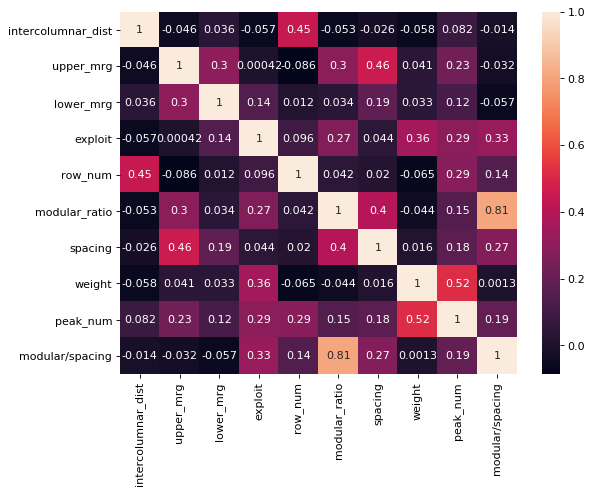

In [7]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Plot data by their class

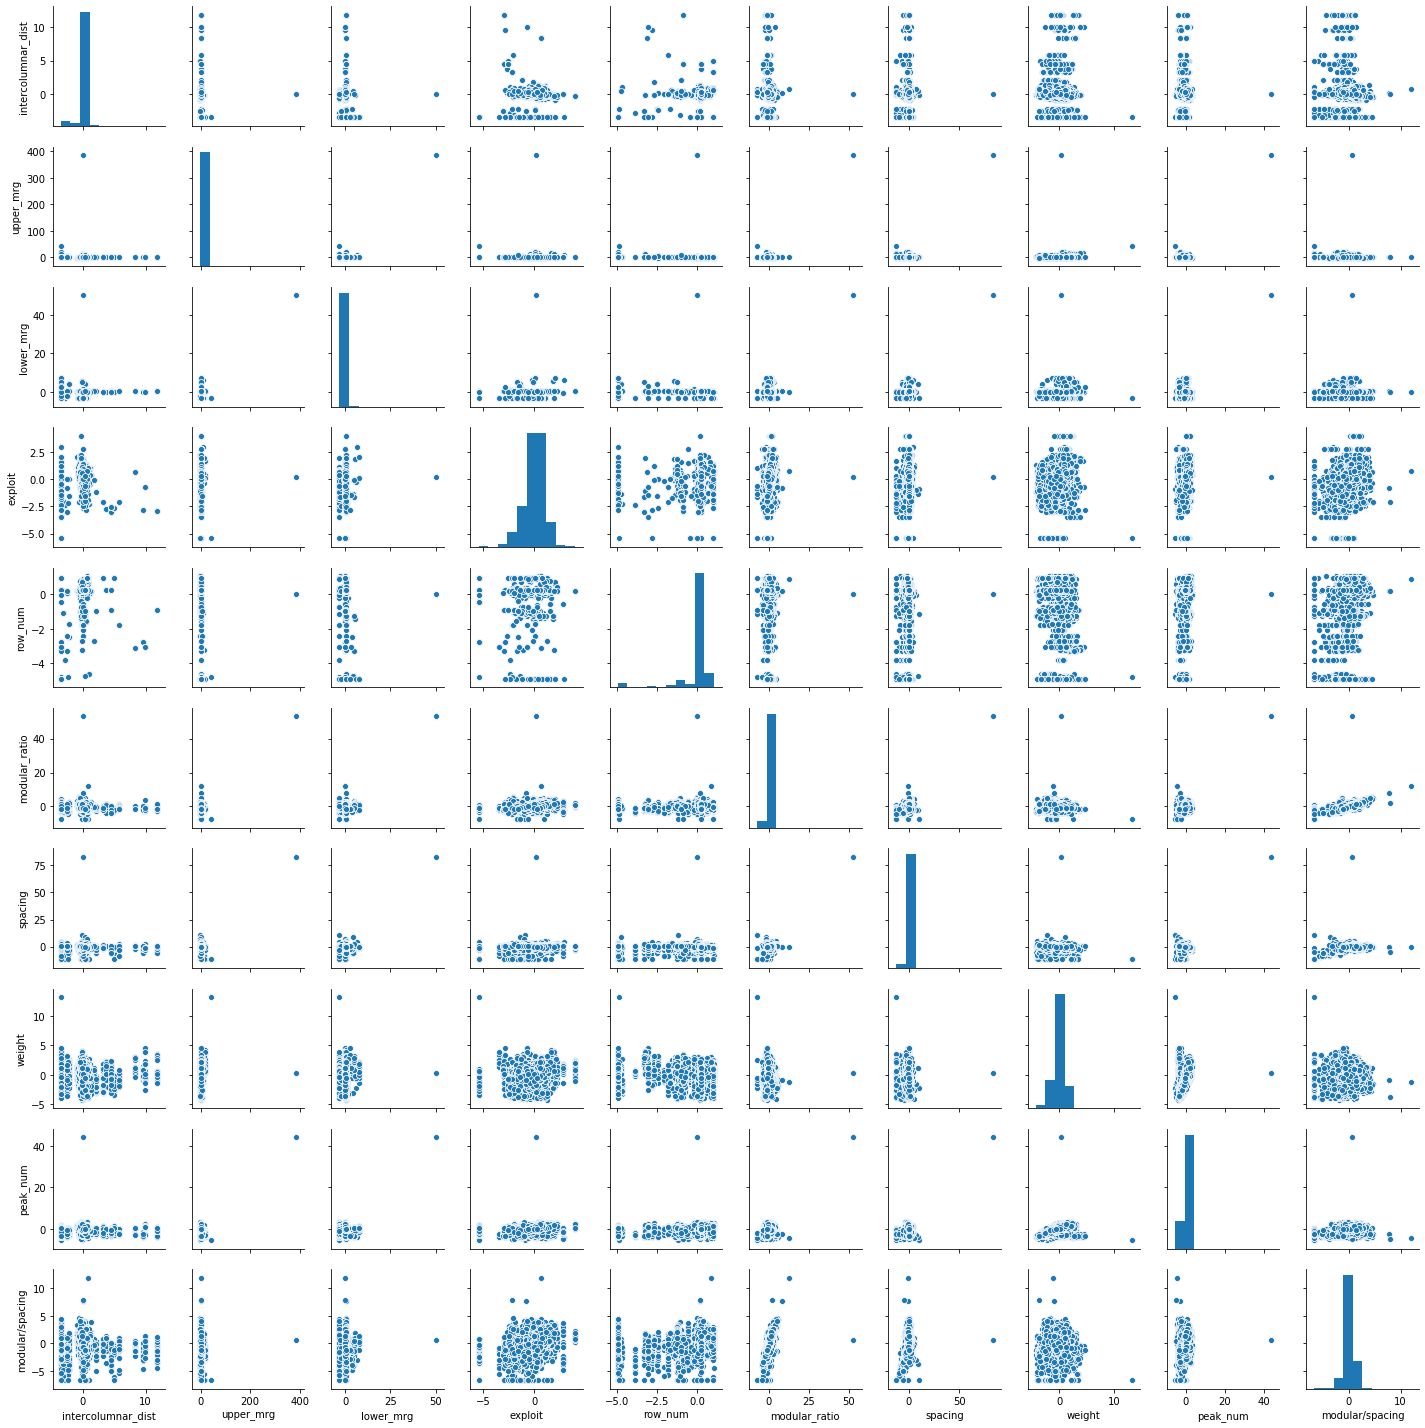

In [8]:
sns.pairplot(data, height=2)

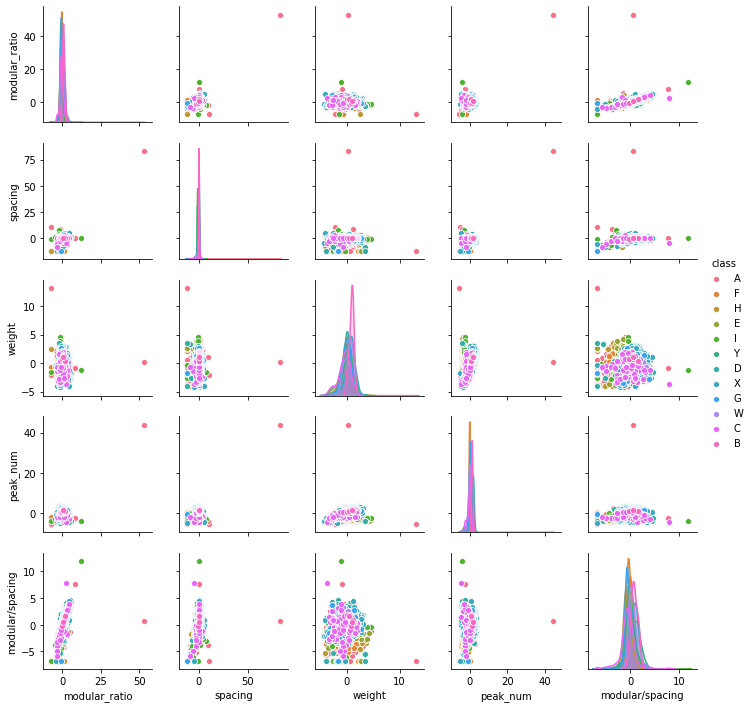

In [9]:
sns.pairplot(data[DATASET_COLUMNS[5:]], hue='class', height=2)

# Prediction

## Creating train and test datasets

In [18]:
from sklearn.model_selection import train_test_split

# ==== Params ==== #
testSize = 0.2
randomState = 107
# ================ #

x_train, x_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'] ,test_size = testSize, random_state=randomState)
print(f" Shape X : {x_train.shape} {x_test.shape}")
print(f" Shape Y : {y_train.shape}    {y_test.shape}")

 Shape X : (16693, 10) (4174, 10)
 Shape Y : (16693,)    (4174,)


## Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

def LogisticRegressionModel(x_train, y_train, x_test):
    reg = LogisticRegression().fit(x_train, y_train)
    return reg.predict(x_test)

## K-Nearest Neighbour (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

def KNNModel(x_train, y_train, x_test):
    knn = KNeighborsClassifier().fit(x_train, y_train)
    return knn.predict(x_test)

## Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTreeModel(x_train, y_train, x_test):
    tree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
    return tree.predict(x_test)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

def RandomForestModel(x_train, y_train, x_test):
    forest = RandomForestClassifier(random_state=0).fit(x_train, y_train)
    return forest.predict(x_test)

## Gradient boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoostingModel(x_train, y_train, x_test):
    grdt = GradientBoostingClassifier(random_state=0).fit(x_train, y_train)
    return grdt.predict(x_test)

## Testing Classification Algorithm

In [24]:
classifcation = {
    "Logistic regression":LogisticRegressionModel,
    "K-Nearest Neighbour (KNN)":KNNModel,
    "Decision tree":DecisionTreeModel,
    "Random Forest":RandomForestModel,
    "Gradient boosting":GradientBoostingModel
}

In [25]:
from sklearn.metrics import classification_report

for name, fct in classifcation.items():
    print(f'----------------- {name} -----------------')
    predictions = fct(x_train, y_train, x_test)
    print(classification_report(y_test, predictions))

----------------- Logistic regression -----------------


C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.52      0.93      0.67      1706
           B       1.00      1.00      1.00         1
           C       0.00      0.00      0.00        43
           D       0.00      0.00      0.00       148
           E       0.49      0.24      0.32       403
           F       0.38      0.10      0.16       795
           G       0.00      0.00      0.00       184
           H       0.41      0.18      0.25       223
           I       0.85      0.84      0.84       311
           W       0.50      0.04      0.07        25
           X       0.76      0.72      0.74       237
           Y       0.67      0.63      0.65        98

    accuracy                           0.55      4174
   macro avg       0.47      0.39      0.39      4174
weighted avg       0.48      0.55      0.47      4174

----------------- K-Nearest Neighbour (KNN) -----------------
              precision    recall  f1-score   support

           A    

In [28]:
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(random_state=0)
cross_val_score(forest, x_train, y_train, cv=10)

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.99461078, 0.99161677, 0.99401198, 0.9892151 , 0.99041342,
       0.9922109 , 0.99460755, 0.98741762, 0.99460755, 0.99041342])

## Save Model

In [34]:
import pickle

forest = RandomForestClassifier(random_state=0).fit(x_train, y_train)

with open('../api/model.pickle', 'wb') as handle:
    pickle.dump(forest, handle, protocol=pickle.HIGHEST_PROTOCOL)